In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

plt.rcParams['font.size'] = '16'

sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('train.csv')
df = df.set_index('Id')

In [3]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 80)

In [5]:
numeric_columns = df.loc[:, df.dtypes != object].columns
categorical_columns = df.loc[:, df.dtypes == object].columns

In [6]:
print(f'{len(numeric_columns)} numeric and {len(categorical_columns)} categorical columns')

37 numeric and 43 categorical columns


<AxesSubplot:>

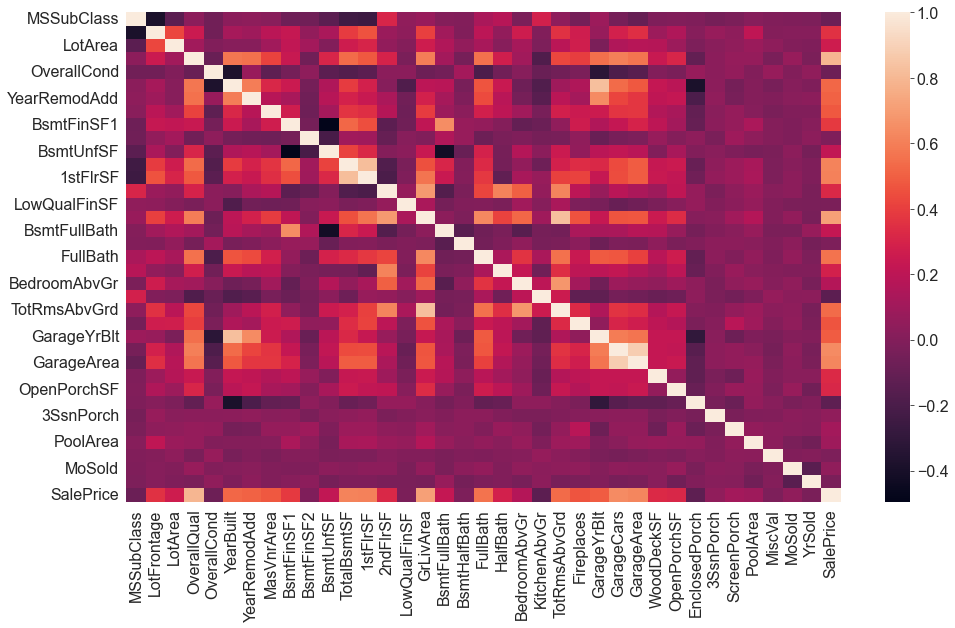

In [7]:
fig = plt.figure(figsize=(16, 9))
sns.heatmap(df[numeric_columns].corr())

Detecting highly correlating numeric columns

In [8]:
cor_matrix = df[numeric_columns].corr()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]

In [9]:
print(f'Correlating features: {to_drop}')

Correlating features: ['GarageArea']


Not that much correlation among features, so we may leave them in our df

#### Numeric features distributions

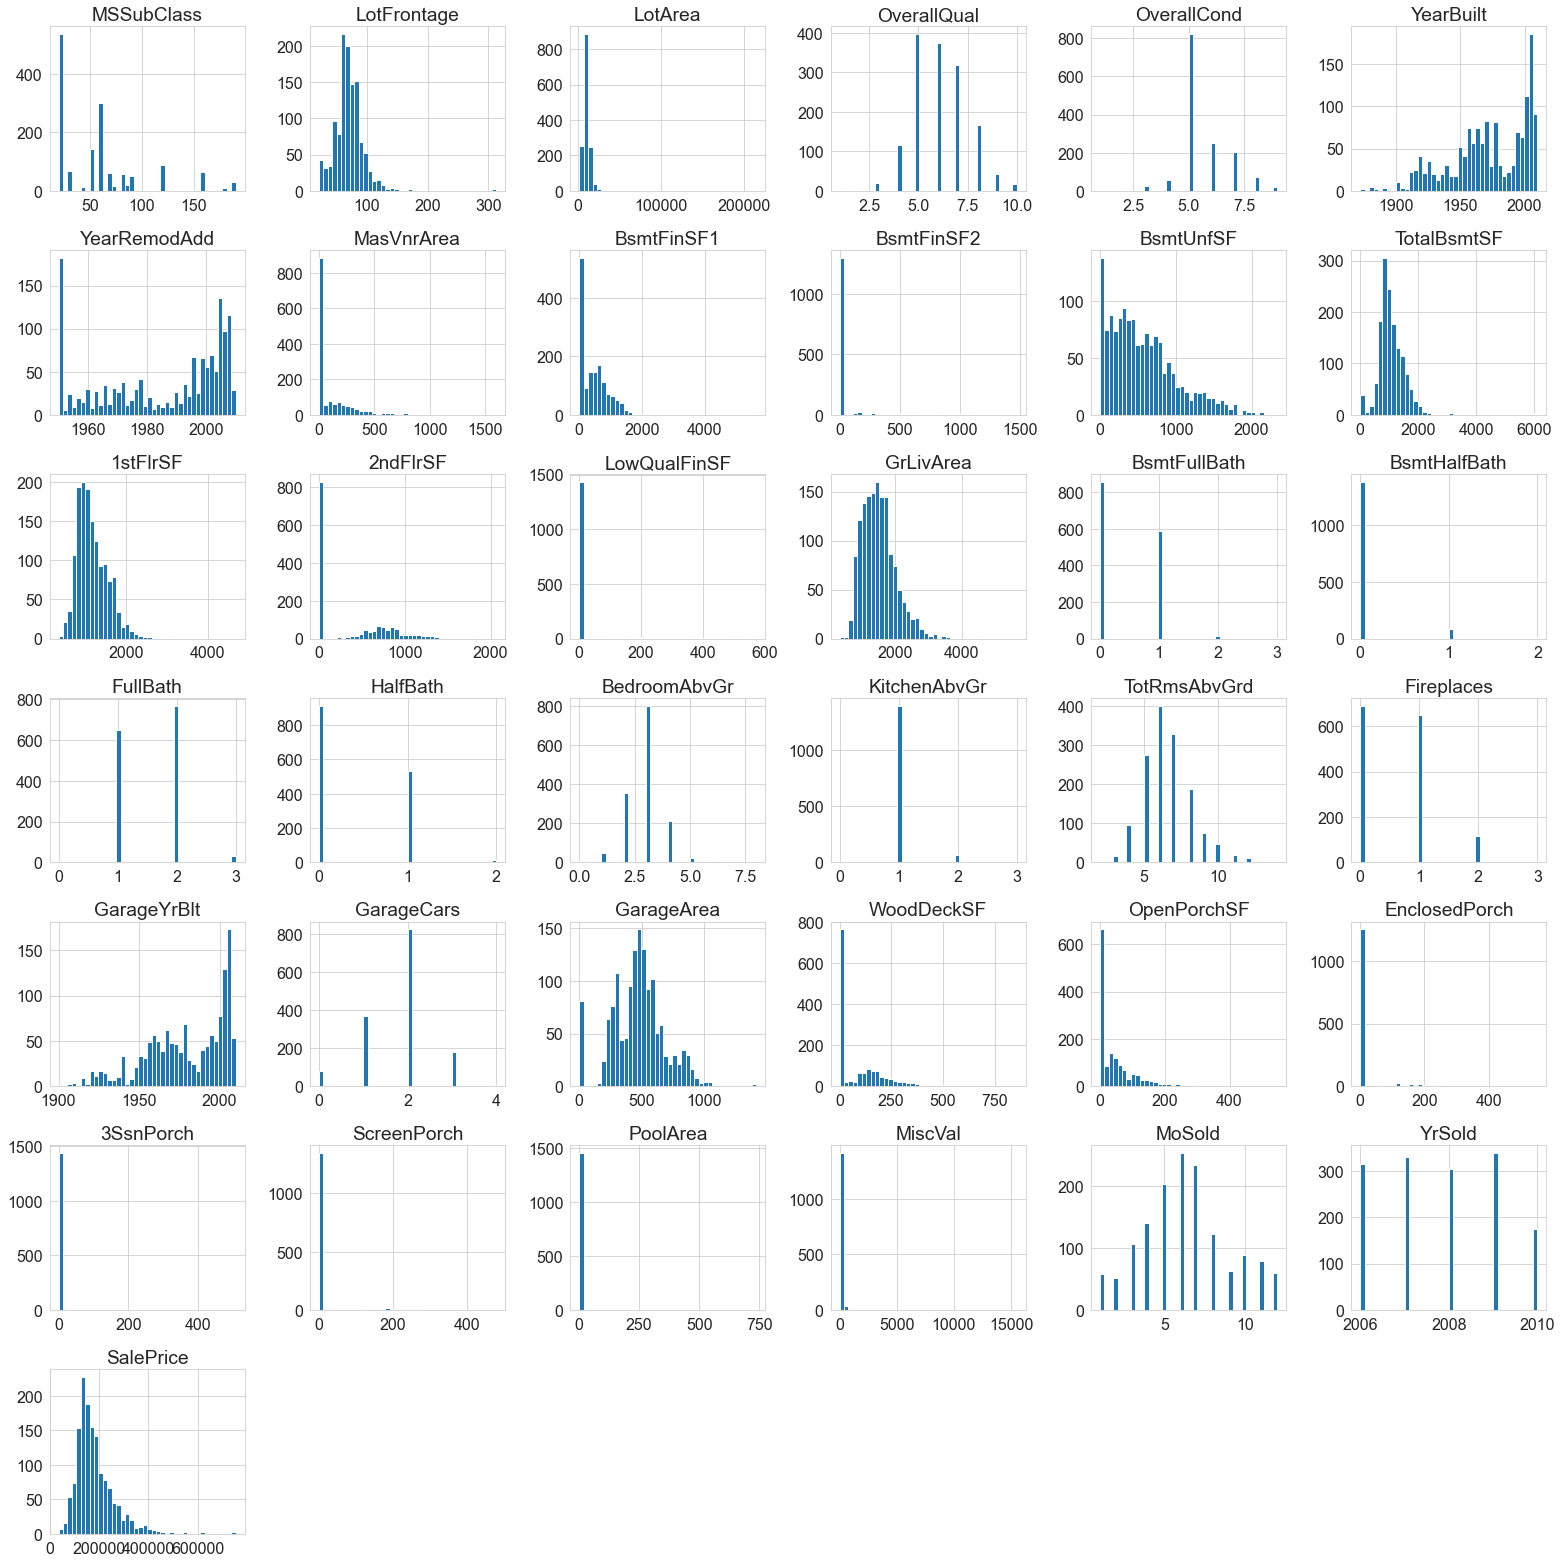

In [10]:
df[numeric_columns].hist(figsize=(22, 22), bins=40)
plt.tight_layout()

*BsmtFinSF2*, *LowQualFinSF*, *KitchenAbvGr*, *EnclosedPorch*, *3SsnPorch*, *ScreenPorch*,
*PoolArea* and *MiscVal* seem to be quasi-constant - let's check it

In [11]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.1)
selector.fit(df[numeric_columns])

# to_drop = [x for x in numeric_columns if x not in selector.get_feature_names_out()]
print('Quasi-constant features detected:', to_drop)

Quasi-constant features detected: ['GarageArea']


In [12]:
df.BsmtHalfBath.value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

In [13]:
df.KitchenAbvGr.value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [14]:
# df = df.drop(to_drop, axis=1)
df = df.drop(['BsmtHalfBath', 'KitchenAbvGr'], axis=1)

In [15]:
"""
Update numeric columns
"""
numeric_columns = df.loc[:, df.dtypes != object].columns

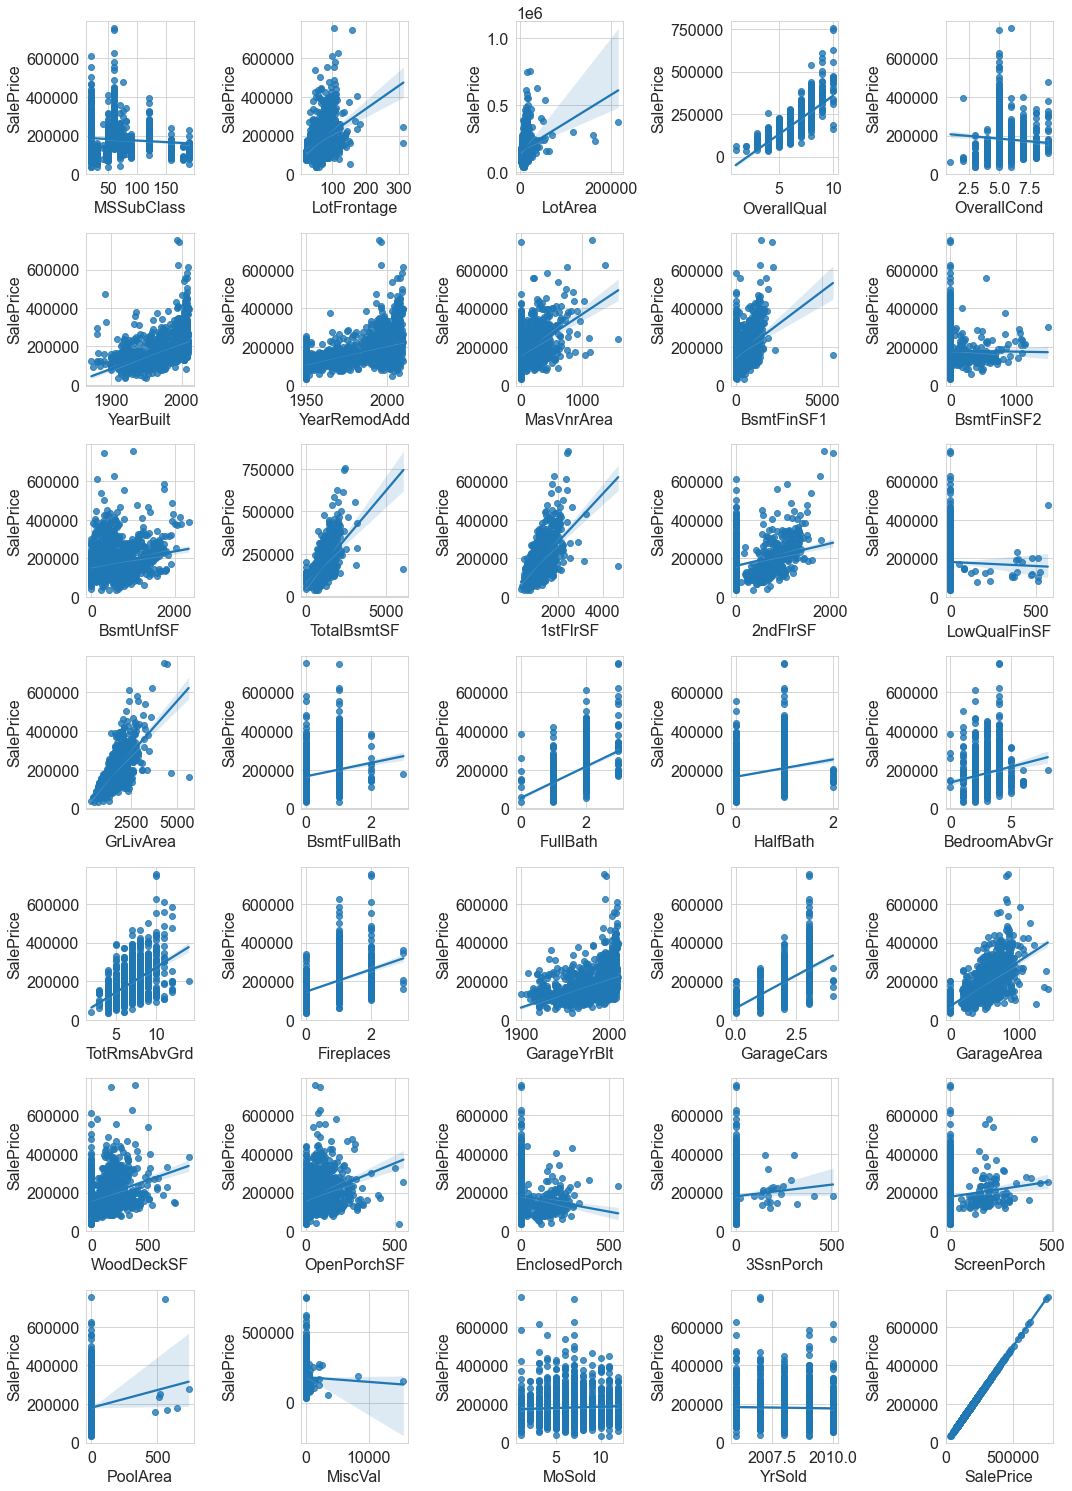

In [16]:
fig = plt.figure(figsize=(15, 21))

counter = 1
for col in numeric_columns:
    ax = fig.add_subplot(7, 5, counter)
    sns.regplot(df[col], df.SalePrice)
    counter += 1
plt.tight_layout()

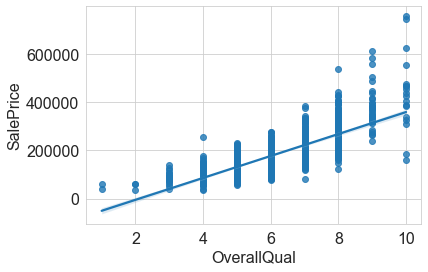

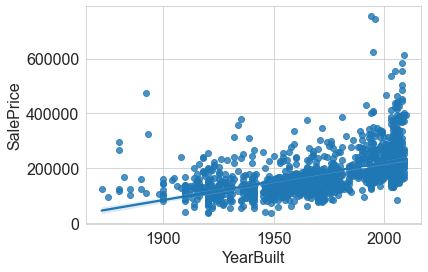

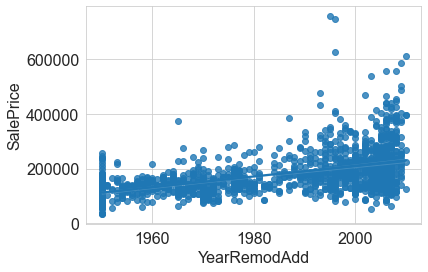

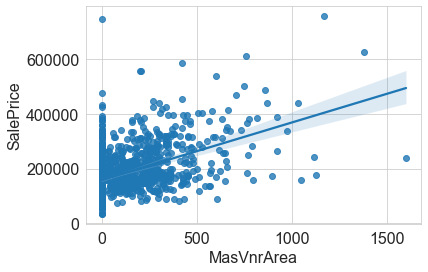

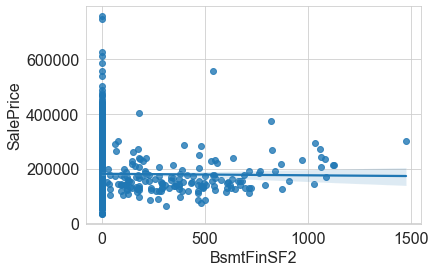

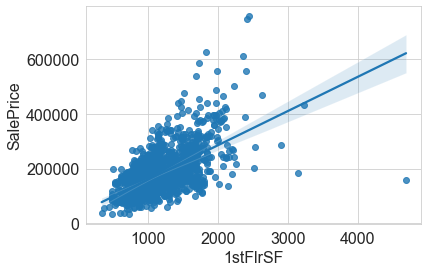

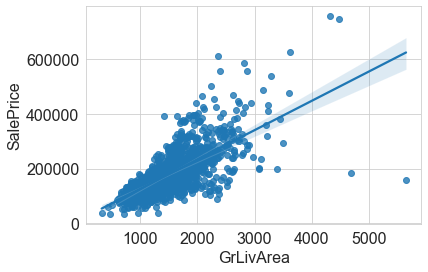

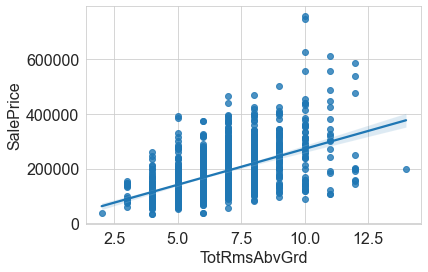

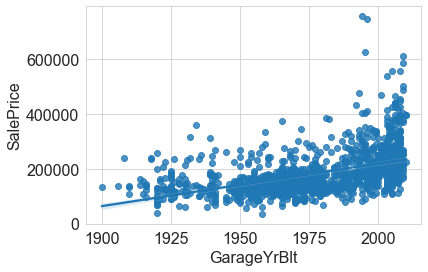

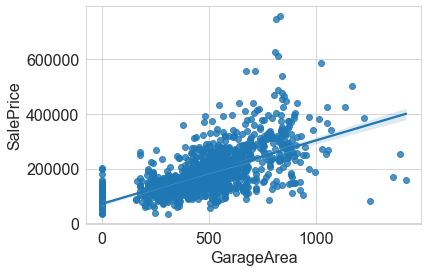

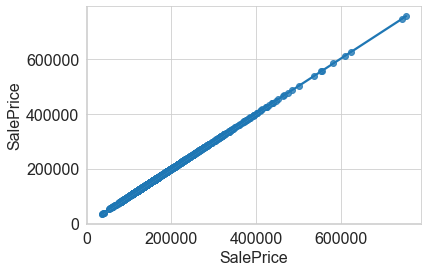

In [17]:
high_corr_features = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
                      'BsmtFinSF2','1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 
                      'GarageYrBlt', 'GarageArea', 'SalePrice']
for feature in high_corr_features:
    plt.figure()
    sns.regplot(x=df[feature], y=df['SalePrice'])

In [18]:
df = pd.concat(
    (df[high_corr_features], df[categorical_columns]),
    axis=1
)

In [19]:
# low_corr_features = [
#     'MoSold', 'YrSold'
# ]
# df = df.drop(low_corr_features, axis=1)

In [20]:
numeric_columns = df.loc[:, df.dtypes != object].columns

In [21]:
len(numeric_columns)

11

Filling the missing values

In [22]:
df[numeric_columns].isna().sum() 

OverallQual      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       8
BsmtFinSF2       0
1stFlrSF         0
GrLivArea        0
TotRmsAbvGrd     0
GarageYrBlt     81
GarageArea       0
SalePrice        0
dtype: int64

In [23]:
# fig = plt.figure(figsize=(16, 9))

# plt.title('Linear feet of street connected to property distribution ')

# ax1 = fig.add_subplot(1, 2, 1)
# sns.histplot(df.LotFrontage)

# ax2 = fig.add_subplot(1, 2, 2)
# sns.boxplot(y=df.LotFrontage)

# plt.tight_layout()

In [24]:
# filler = df.LotFrontage.fillna(
#     df.groupby(['MSSubClass', 'MSZoning', 'LotShape']).LotFrontage.transform('mean')
# )

# df = df[~filler.isna()]
# df.LotFrontage = df.LotFrontage.fillna(filler)

<AxesSubplot:title={'center':'Year of garage building distribution'}, xlabel='GarageYrBlt', ylabel='Count'>

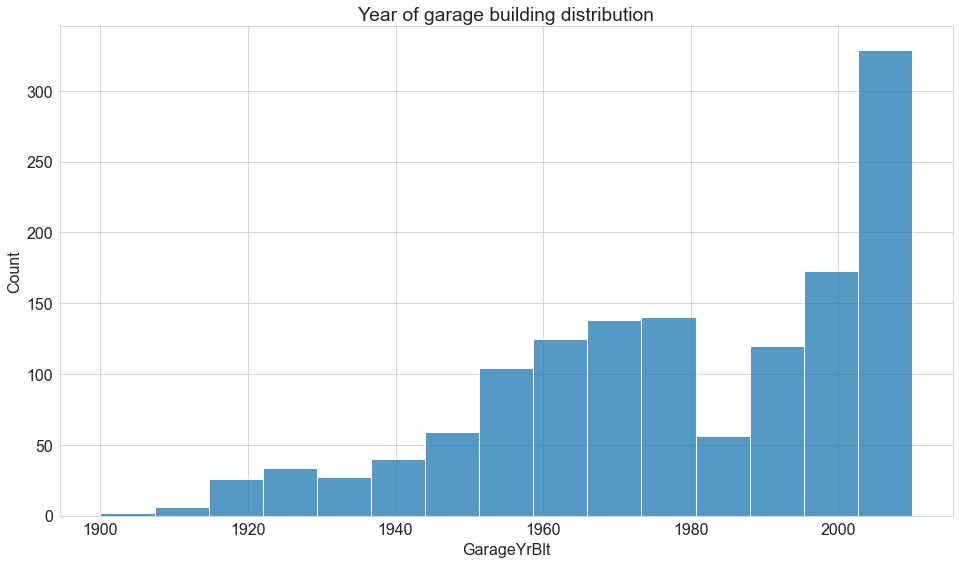

In [25]:
fig = plt.figure(figsize=(16, 9))
plt.title('Year of garage building distribution')
sns.histplot(df.GarageYrBlt)

<AxesSubplot:title={'center':'Year correlation'}>

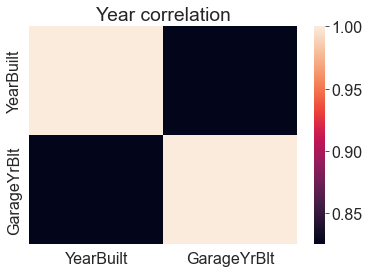

In [26]:
plt.title('Year correlation')
sns.heatmap(df[['YearBuilt', 'GarageYrBlt']].corr())

In [27]:
df.GarageYrBlt = df.GarageYrBlt.fillna(
    df.YearBuilt
)

In [28]:
df = df.drop(
    df[categorical_columns].isna().sum().sort_values(ascending=False)[:5].index,
    axis=1
)

(0.0, 800.0)

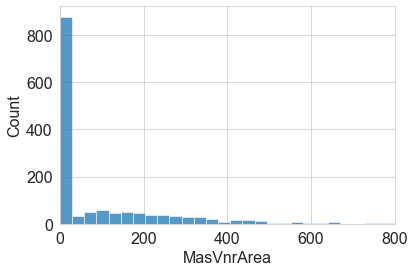

In [29]:
sns.histplot(x=df.MasVnrArea)
plt.xlim(0, 800)

In [30]:
df.MasVnrArea = df.MasVnrArea.fillna(
    df.MasVnrArea.mean()
)

In [31]:
df[numeric_columns].isna().any().any()

False

In [32]:
# df = df.drop(['GarageCond', 'Electrical'
# , 'GarageQual', 'BsmtFinType2', 'BsmtCond'], axis=1)

In [33]:
# df[categorical_columns].isna().sum().sort_values(ascending=False)[:10]

In [34]:
df = df.drop(df.columns[df.isna().any()], axis=1)

In [35]:
df.isna().any().any()

False

In [36]:
df.shape

(1460, 38)

In [37]:
df['Target'] = df.SalePrice
df = df.drop('SalePrice', axis=1)

In [38]:
numeric_columns = df.loc[:, df.dtypes != object].columns
categorical_columns = df.loc[:, df.dtypes == object].columns

<AxesSubplot:>

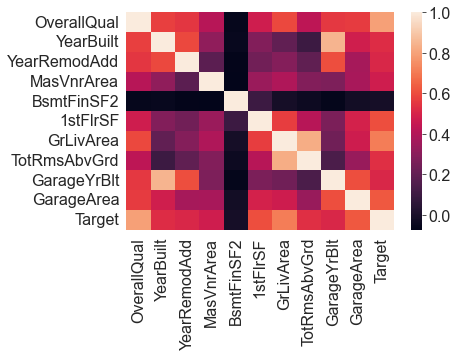

In [39]:
sns.heatmap(df[numeric_columns].corr())

<AxesSubplot:xlabel='BsmtFinSF2', ylabel='Target'>

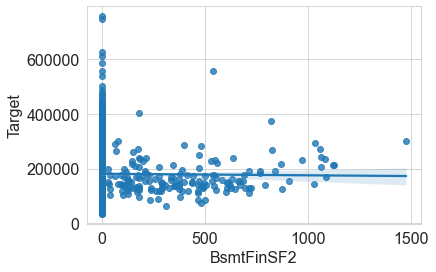

In [40]:
sns.regplot(x=df.BsmtFinSF2, y=df.Target)

In [41]:
df = df.drop('BsmtFinSF2', axis=1)

In [42]:
numeric_columns = df.loc[:, df.dtypes != object].columns

<AxesSubplot:>

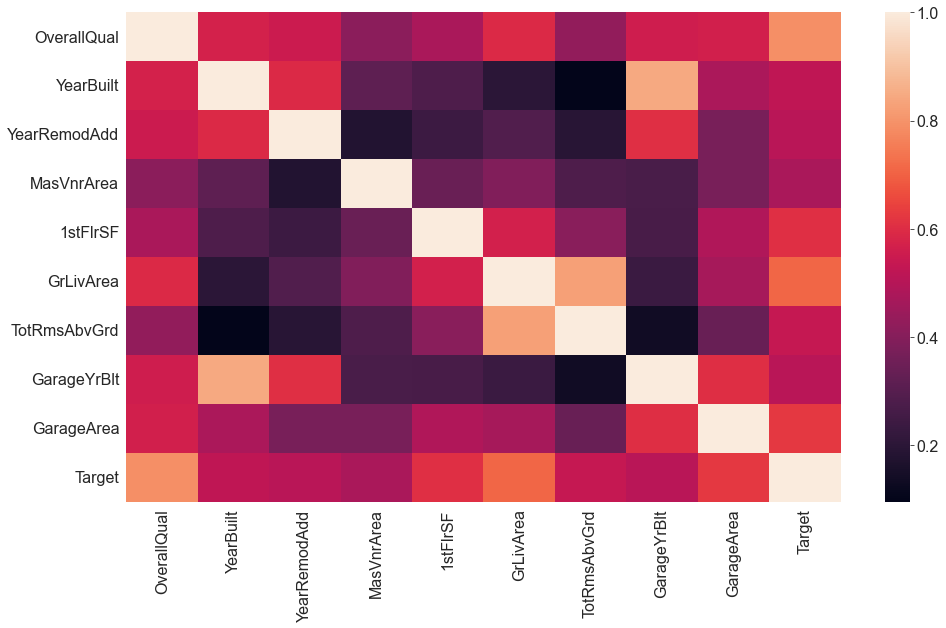

In [43]:
fig = plt.figure(figsize=(16, 9))

sns.heatmap(df[numeric_columns].corr())

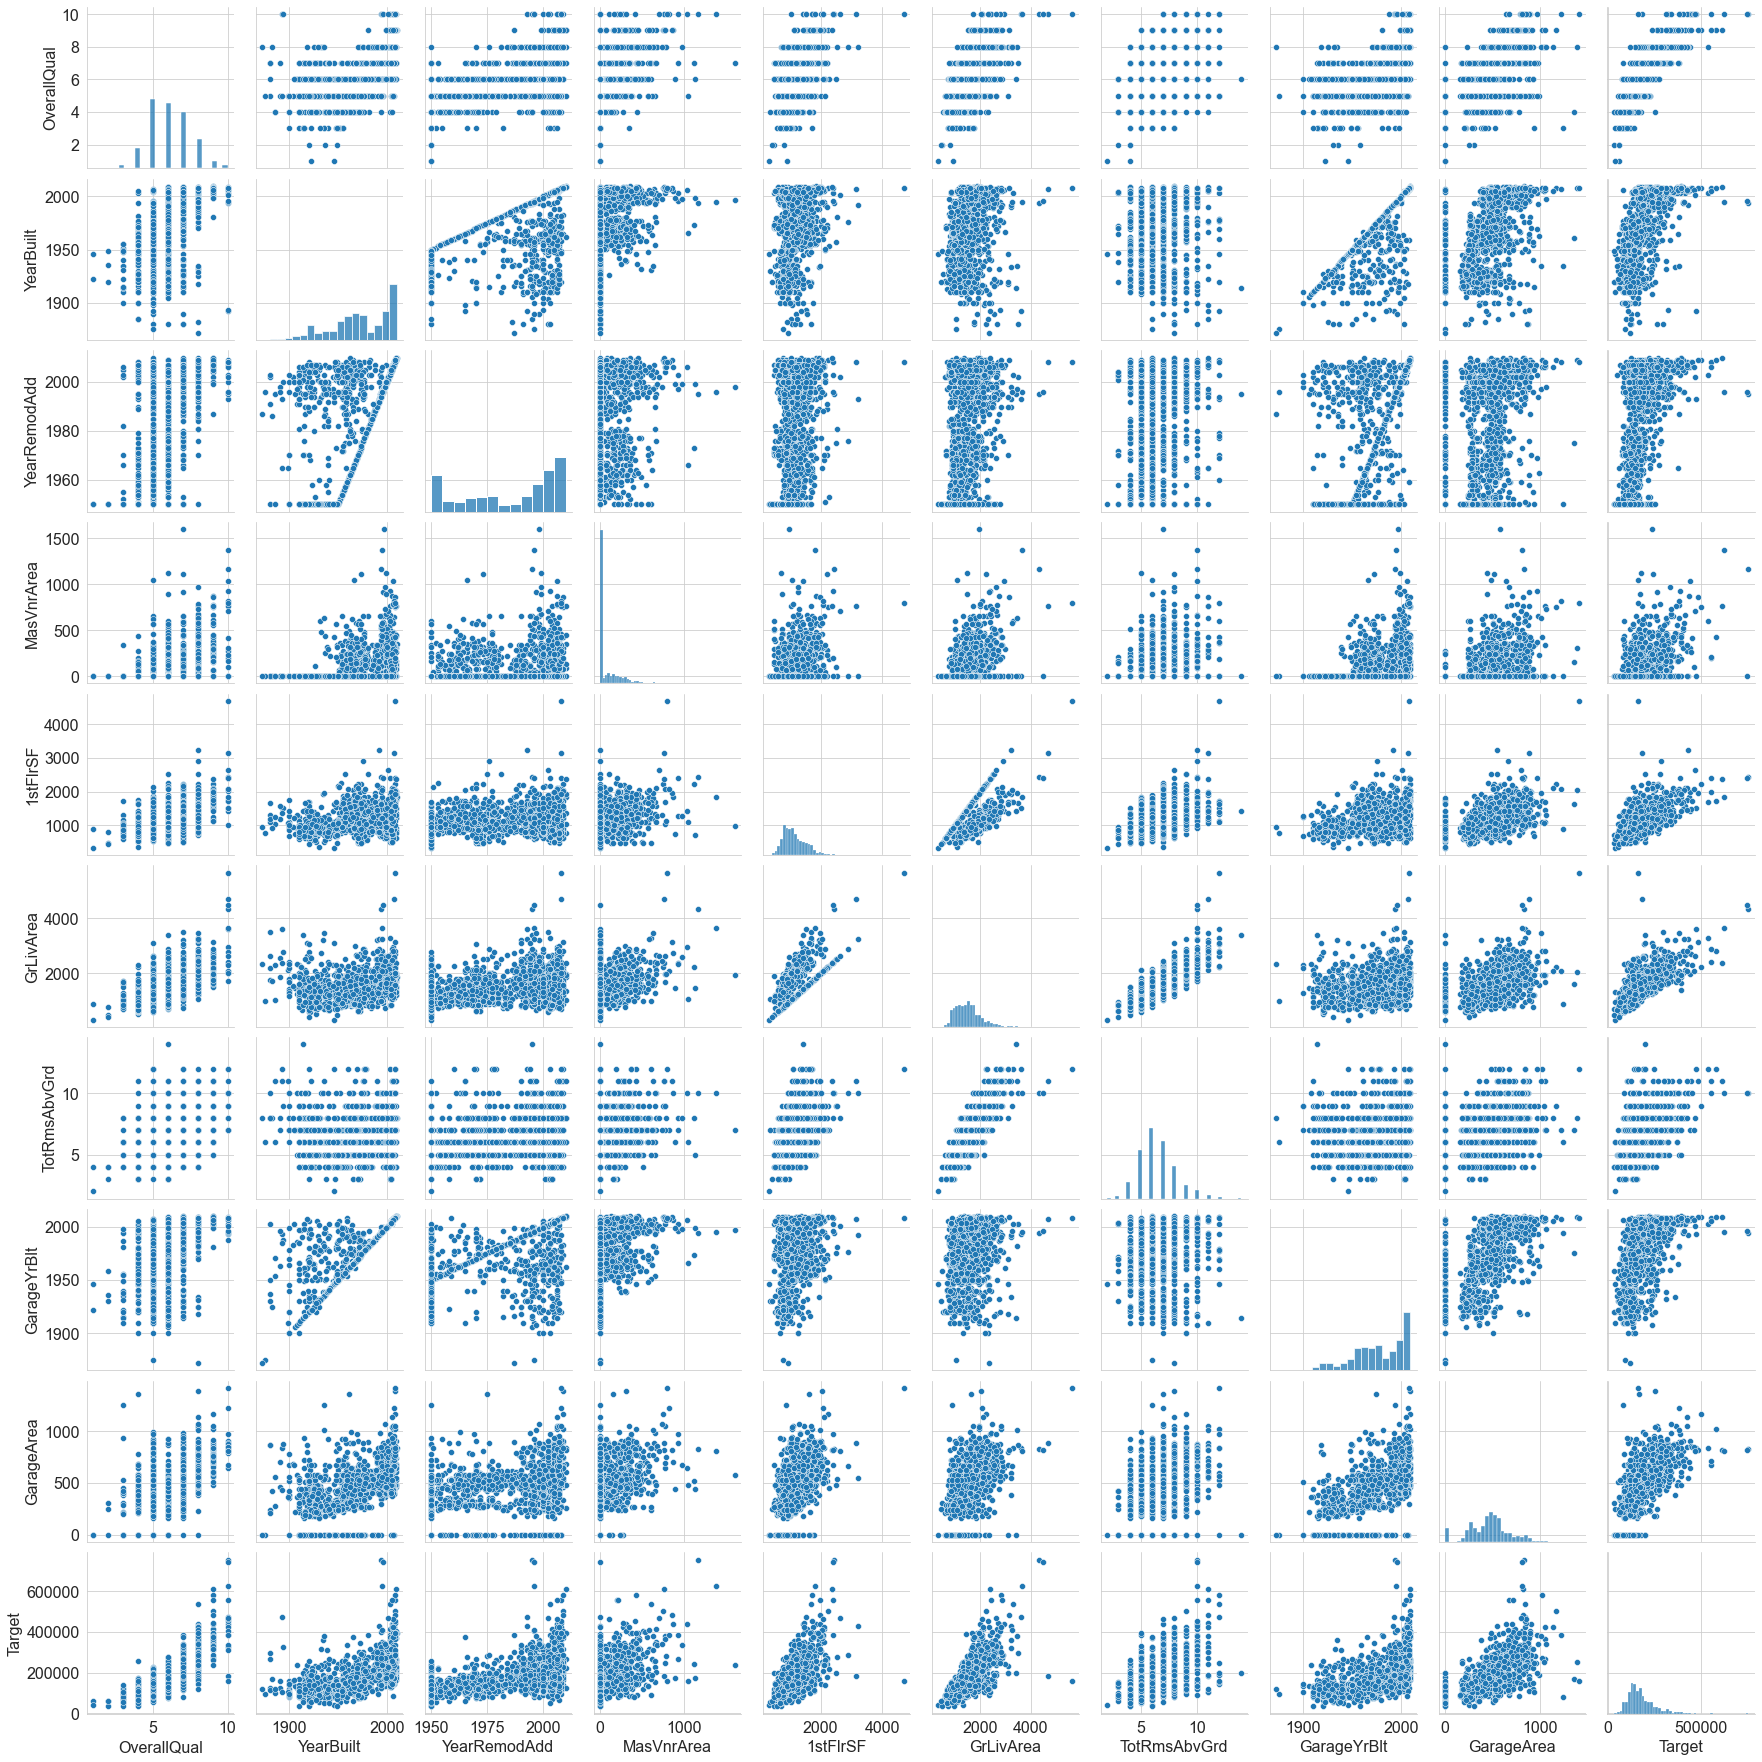

In [44]:
sns.pairplot(df[numeric_columns])

Removing target outliers

In [45]:
df_2 = df.copy()

upper_percentile = df_2.Target.quantile(0.975)
lower_percentile = df_2.Target.quantile(0.005)

print(f'97.5% target percentile: {upper_percentile}')
print(f'0.5% target percentile: {lower_percentile}')

97.5% target percentile: 384510.7499999999
0.5% target percentile: 55000.0


In [46]:
# size = len(df_2[(df_2.Target <= lower_percentile) | (df_2.Target >= upper_percentile)]) 

# print(f'Outlier samples to be dropped: {size}')

In [47]:
df_2 = df_2[df_2.Target.between(lower_percentile, upper_percentile)]

In [48]:
df_2.shape

(1416, 37)

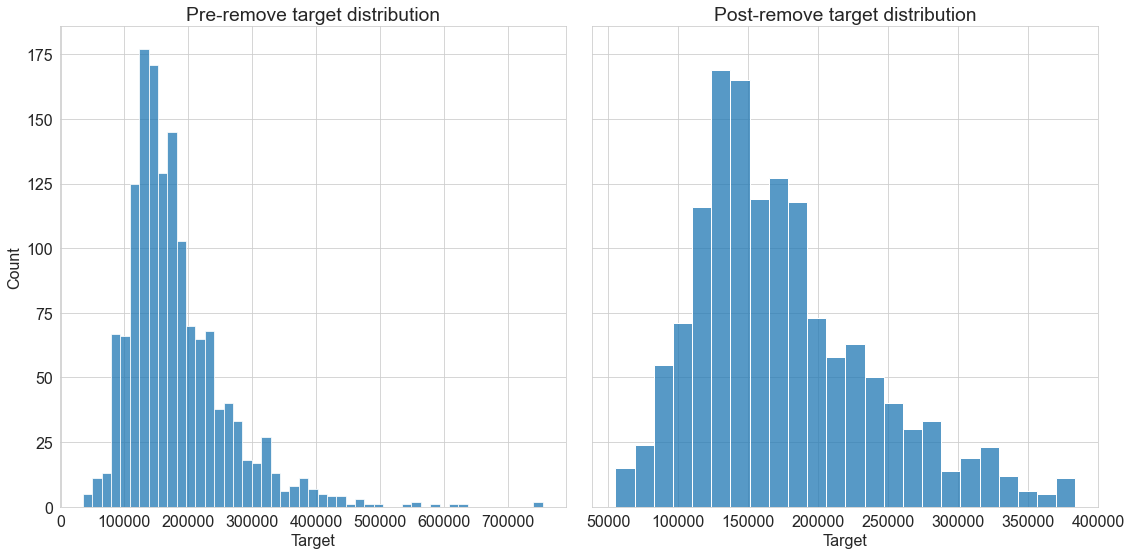

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

sns.histplot(df.Target, ax=axes[0])
axes[0].set_title('Pre-remove target distribution')

sns.histplot(df_2.Target, ax=axes[1])
axes[1].set_title('Post-remove target distribution')

fig.tight_layout()

In [50]:
df_2[categorical_columns]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,GasA,Ex,Y,TA,Typ,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,GasA,TA,Y,TA,Min1,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,Ex,Gd,Stone,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


In [51]:
for col in categorical_columns:
    print(col, '\n', df_2[col].value_counts(), '\n')

MSZoning 
 RL         1114
RM          214
FV           65
RH           16
C (all)       7
Name: MSZoning, dtype: int64 

Street 
 Pave    1410
Grvl       6
Name: Street, dtype: int64 

LotShape 
 Reg    905
IR1    466
IR2     35
IR3     10
Name: LotShape, dtype: int64 

LandContour 
 Lvl    1274
Bnk      62
HLS      46
Low      34
Name: LandContour, dtype: int64 

Utilities 
 AllPub    1415
NoSeWa       1
Name: Utilities, dtype: int64 

LotConfig 
 Inside     1022
Corner      257
CulDSac      87
FR2          46
FR3           4
Name: LotConfig, dtype: int64 

LandSlope 
 Gtl    1342
Mod      61
Sev      13
Name: LandSlope, dtype: int64 

Neighborhood 
 NAmes      225
CollgCr    149
OldTown    110
Edwards    100
Somerst     85
Gilbert     79
Sawyer      74
NWAmes      73
NridgHt     59
SawyerW     59
BrkSide     56
Crawfor     50
Mitchel     49
Timber      38
IDOTRR      34
NoRidge     33
ClearCr     28
SWISU       25
StoneBr     19
MeadowV     17
Blmngtn     17
BrDale      16
Veenker  

Removing quasi-constant categorical features

In [52]:
df_2 = df_2.drop(
    ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir'],
    axis=1
)

Removing low-importance features

In [53]:
df_2 = df_2.drop(
    ['LotConfig', 'RoofStyle', 'Exterior1st', 'Exterior2nd'],
    axis=1
)

In [54]:
categorical_columns = df_2.loc[:, df_2.dtypes == object].columns

Encoding categorical features

In [55]:
len(categorical_columns) + len(numeric_columns) == df_2.shape[1]

True

In [56]:
len(categorical_columns)

17

In [57]:
overall = 0
counter = 0
one_hot_columns = []
mean_target_columns = []

for col in categorical_columns:
    overall += df_2[col].nunique() if df_2[col].nunique() < 5 else 0
    if df_2[col].nunique() < 5:
        one_hot_columns.append(col) 
    else:
        mean_target_columns.append(col)
print('Columns to one-hot-encode:', len(one_hot_columns))
print('New columns:', overall - len(one_hot_columns))

Columns to one-hot-encode: 6
New columns: 16


Perform one-hot encoding for some of the categorical columns

In [58]:
df_enc = df_2.copy()

for col in one_hot_columns:
    df_enc = pd.concat(
        (df_enc.drop(col, axis=1), pd.get_dummies(df_enc[col], prefix=col, drop_first=True)),
        axis=1
    )

In [59]:
# !pip install feature_engine

In [61]:
from feature_engine.encoding import MeanEncoder

encoder = MeanEncoder(variables=mean_target_columns)
encoder.fit(df_enc.drop('Target', axis=1), df_enc.Target)

df_enc = pd.concat(
    (encoder.transform(df_enc.drop('Target', axis=1)), df_enc.Target),
    axis=1
)

In [62]:
df_enc.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,MSZoning,Neighborhood,Condition1,BldgType,HouseStyle,ExterCond,Foundation,HeatingQC,Functional,SaleType,SaleCondition,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,PavedDrive_P,PavedDrive_Y,Target
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,7,2003,2003,196.0,856,1710,8,2003.0,548,182564.43088,196442.926174,177151.298935,177983.229397,199306.088785,176790.622383,211648.913540,202245.635977,176415.444613,170481.513644,172045.134746,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,208500
2,6,1976,1976,0.0,1262,1262,6,1976.0,460,182564.43088,224150.000000,144911.569620,177983.229397,169971.940171,176790.622383,149704.221338,202245.635977,176415.444613,170481.513644,172045.134746,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,181500
3,7,2001,2002,162.0,920,1786,6,2001.0,608,182564.43088,196442.926174,177151.298935,177983.229397,199306.088785,176790.622383,211648.913540,202245.635977,176415.444613,170481.513644,172045.134746,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,223500
4,7,1915,1970,0.0,961,1717,7,1998.0,642,182564.43088,206987.220000,177151.298935,177983.229397,199306.088785,176790.622383,131199.979021,155340.285714,176415.444613,170481.513644,143774.000000,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,140000
5,8,2000,2000,350.0,1145,2198,9,2000.0,836,182564.43088,288200.242424,177151.298935,177983.229397,199306.088785,176790.622383,211648.913540,202245.635977,176415.444613,170481.513644,172045.134746,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,250000


In [63]:
df_enc.shape

(1416, 37)

#### Modeling

In [64]:
from sklearn.model_selection import train_test_split

X = df_enc.drop('Target', axis=1)
y = df_enc.Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1 \
                                                    , shuffle=True, random_state=69)

In [65]:
 np.linspace(0.01, 1, num=40)

array([0.01      , 0.03538462, 0.06076923, 0.08615385, 0.11153846,
       0.13692308, 0.16230769, 0.18769231, 0.21307692, 0.23846154,
       0.26384615, 0.28923077, 0.31461538, 0.34      , 0.36538462,
       0.39076923, 0.41615385, 0.44153846, 0.46692308, 0.49230769,
       0.51769231, 0.54307692, 0.56846154, 0.59384615, 0.61923077,
       0.64461538, 0.67      , 0.69538462, 0.72076923, 0.74615385,
       0.77153846, 0.79692308, 0.82230769, 0.84769231, 0.87307692,
       0.89846154, 0.92384615, 0.94923077, 0.97461538, 1.        ])

Linear regression:

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

scaler_x = StandardScaler()
scaler_x.fit(X_train)

# scaler_y = StandardScaler()
# scaler_y.fit(y_train)

lr = LinearRegression()
lr.fit(scaler_x.transform(X_train), y_train)

y_lr = lr.predict(scaler_x.transform(X_test))

Lasso regression:

In [67]:
pipe_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

params = {
    'lasso__alpha': np.linspace(-10, 10, num=50)
}

search = GridSearchCV(pipe_lasso, param_grid=params, cv=10, scoring='neg_mean_squared_error')
search.fit(X_train, y_train)

lasso = search.best_estimator_
lasso.fit(X_train, y_train)

y_lasso = lasso.predict(X_test)

Ridge regression:

In [68]:
pipe_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

params = {
    'ridge__alpha': np.linspace(-10, 10, num=50)
}

search = GridSearchCV(pipe_ridge, params, cv=10, scoring='neg_mean_squared_error')
search.fit(X_train, y_train)

ridge = search.best_estimator_
ridge.fit(X_train, y_train)

y_ridge = ridge.predict(X_test)

Elastic net regression:

In [69]:
# pipe_elastic = Pipeline([
#     ('scaler', StandardScaler()
#     )
# ])

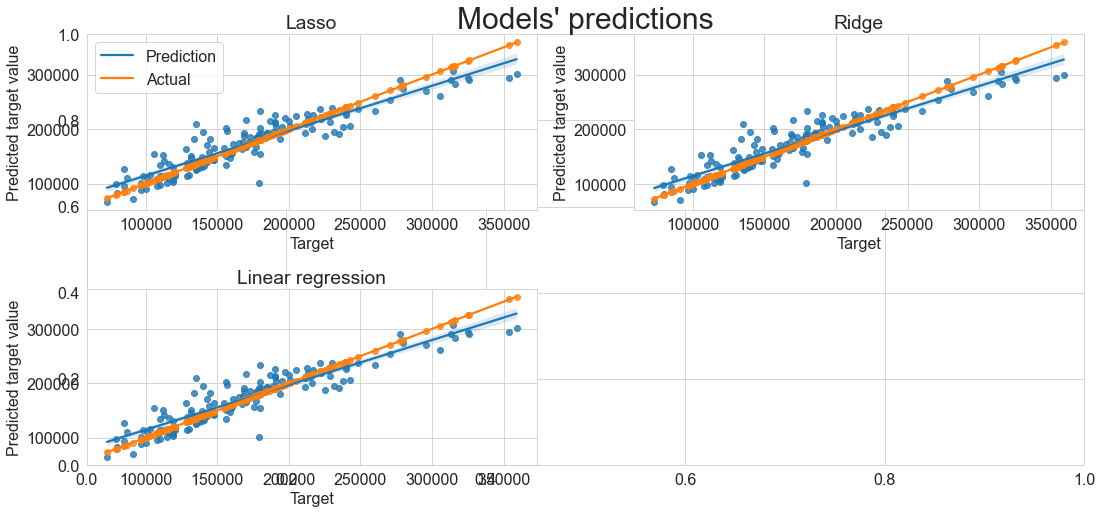

In [149]:
fig = plt.figure(figsize=(16, 8))
plt.title("Models' predictions", fontsize=30)


ax1 = fig.add_subplot(2, 2, 1)
sns.regplot(x=y_test, y=y_lasso)
sns.regplot(x=y_test, y=y_test)
plt.ylabel('Predicted target value')
plt.title('Lasso')
plt.legend(['Prediction', 'Actual'])

ax2 = fig.add_subplot(2, 2, 2)
sns.regplot(x=y_test, y=y_ridge)
sns.regplot(x=y_test, y=y_test)


plt.ylabel('Predicted target value')
plt.title('Ridge')
plt.legend(['Prediction', 'Actual'])


ax3 = fig.add_subplot(2, 2, 3)
sns.regplot(x=y_test, y=y_lr)
sns.regplot(x=y_test, y=y_test)
plt.ylabel('Predicted target value')
plt.title('Linear regression')
plt.legend(['Prediction', 'Actual'])


fig.tight_layout()

Evaluating via `RMSE` score

In [71]:
from sklearn.metrics import mean_squared_error

print('Lasso RMSE score:\t', mean_squared_error(y_test, y_lasso, squared=False))
print('Ridge RMSE score:\t', mean_squared_error(y_test, y_ridge, squared=False))
print('Linear regression RMSE score:\t', mean_squared_error(y_test, y_lr, squared=False))

Lasso RMSE score:	 23014.13040595315
Ridge RMSE score:	 23066.08066317491
Linear regression RMSE score:	 23018.0470678919


Preprocessing the test data

In [72]:
df_test = pd.read_csv('test.csv')
df_test = df_test.set_index('Id')

In [97]:
df_test_2 = df_test.copy()
categorical_columns_test = df_test.loc[:, df_test.dtypes == object]

for col in one_hot_columns:
    df_test_2 = pd.concat(
        (df_test_2.drop(col, axis=1), pd.get_dummies(df_test_2[col] \
                                                     , prefix=col, drop_first=True)),
        axis=1
    )
    
cols = df_enc.drop('Target', axis=1).columns
df_test_2 = df_test_2[cols]

# Missing values
df_test_2.GarageYrBlt = df_test_2.GarageYrBlt.fillna(
    df_test_2.YearBuilt
)

for col in df_test_2.columns[df_test_2.isna().any()]:
    df_test_2[col] = df_test_2[col].fillna(
        df_test_2[col].mean
    )
    
# Mean-target encoding for categorical values    
X_test = encoder.transform(df_test_2)

# Handling missing values after encoding
for col in X_test.columns[X_test.isna().any()]:
    X_test[col] = X_test[col].fillna(
        X_test[col].value_counts().index[0]
        # fill with the most frequent values
    )
    
predictions = lasso.predict(X_test)

In [151]:
result = pd.concat(
    (pd.Series(X_test.index), pd.Series(predictions)),
    axis=1
)

result.columns = ['Id', 'SalePrice']
result.to_csv('result.csv', sep=',', index=False)

In [150]:
result.head()

,Id,SalePrice
0,1461,116418.065870
1,1462,156629.450071
2,1463,168093.280412
3,1464,188245.731741
4,1465,236570.491197
